In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.datasets import make_moons
from scipy.cluster.hierarchy import dendrogram
from IPython.core.display import Image

### Agglomerative Clustering Types
 * Moons

https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

<Axes: xlabel='x', ylabel='y'>

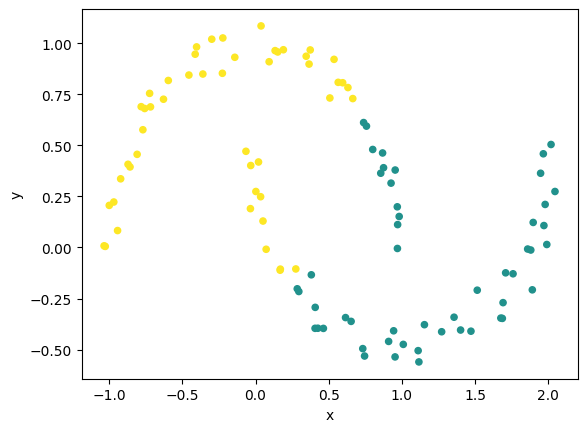

In [2]:
df = pd.DataFrame(make_moons(noise=0.05)[0], columns = [["x","y"]])
df["color"] = KMeans(n_clusters=2).fit_predict(df[["x","y"]])
df.plot.scatter(x="x",y="y", c=df["color"], vmin=-1)

In [3]:
km = KMeans(n_clusters=2).fit(df[["x","y"]])
km.cluster_centers_

array([[ 1.21837424, -0.07714092],
       [-0.18610678,  0.55617574]])

<Axes: xlabel='x', ylabel='y'>

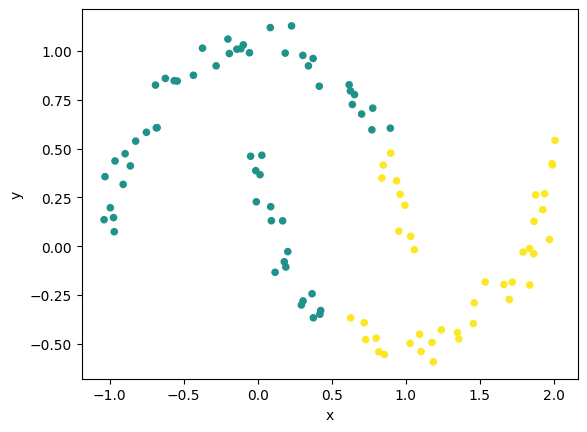

In [4]:
df = pd.DataFrame(make_moons(noise=0.05)[0], columns = [["x","y"]])
df["color"] = AgglomerativeClustering(n_clusters=2, linkage ="ward").fit_predict(df[["x","y"]])
df.plot.scatter(x="x",y="y", c=df["color"], vmin=-1)

<Axes: xlabel='x', ylabel='y'>

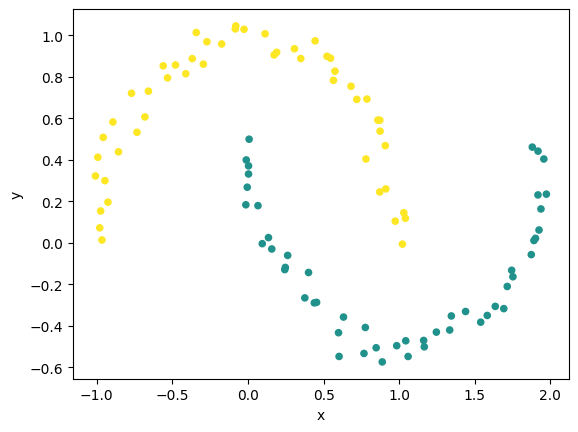

In [5]:
df = pd.DataFrame(make_moons(noise=0.05)[0], columns = [["x","y"]])
df["color"] = AgglomerativeClustering(n_clusters=2, linkage="single").fit_predict(df[["x","y"]])
df.plot.scatter(x="x",y="y", c=df["color"], vmin=-1)

<Axes: xlabel='x', ylabel='y'>

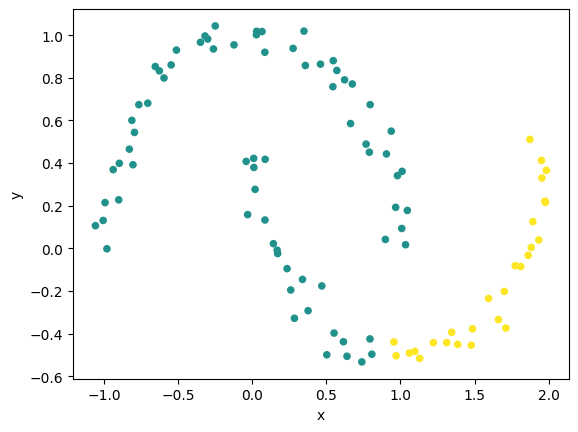

In [6]:
df = pd.DataFrame(make_moons(noise=0.05)[0], columns = [["x","y"]])
df["color"] = AgglomerativeClustering(n_clusters=2, linkage="average").fit_predict(df[["x","y"]])
df.plot.scatter(x="x",y="y", c=df["color"], vmin=-1)

<Axes: xlabel='x', ylabel='y'>

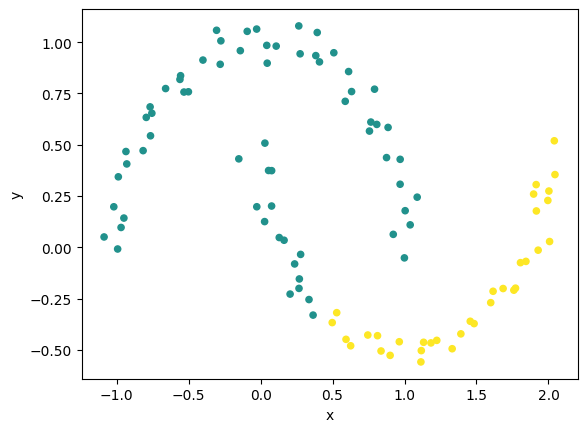

In [7]:
df = pd.DataFrame(make_moons(noise=0.05)[0], columns = [["x","y"]])
df["color"] = AgglomerativeClustering(n_clusters=2, linkage="complete").fit_predict(df[["x","y"]])
df.plot.scatter(x="x",y="y", c=df["color"], vmin=-1)

## Clustering Counties (Agglomerative)

In [8]:
df = gpd.read_file("counties.geojson")

In [9]:
df.head()

,NAME,POP100,AREALAND,HU100,developed,forest,pasture,crops,geometry
0,Racine County,195408,861533739,82164,0.230906,0.100167,0.072588,0.482126,"POLYGON ((645313.81834 2212738.58489, 645456.3..."
1,Clark County,34690,3133378070,15076,0.046476,0.326691,0.022979,0.444642,"POLYGON ((431909.29098 2393751.35940, 433872.5..."
2,Wood County,74749,2054044751,34088,0.080285,0.226244,0.023411,0.320990,"POLYGON ((498653.94690 2388370.84202, 498647.3..."
3,Rusk County,14755,2366092584,8883,0.035567,0.473937,0.049572,0.138357,"POLYGON ((397166.23292 2498521.78567, 397167.7..."
4,Ozaukee County,86395,603514413,36267,0.222642,0.088609,0.127867,0.389109,"POLYGON ((654796.85595 2272096.94081, 654799.8..."


<Axes: >

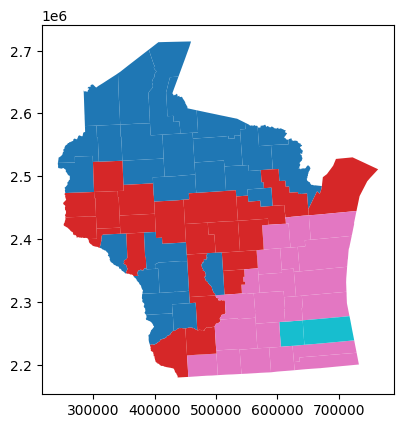

In [10]:
c = AgglomerativeClustering(4, compute_distances=True)
groups = c.fit_predict(df[["forest", "crops", "pasture", "developed"]])
df.plot(column=groups, cmap="tab10")

### Tree Recursion: Node Count

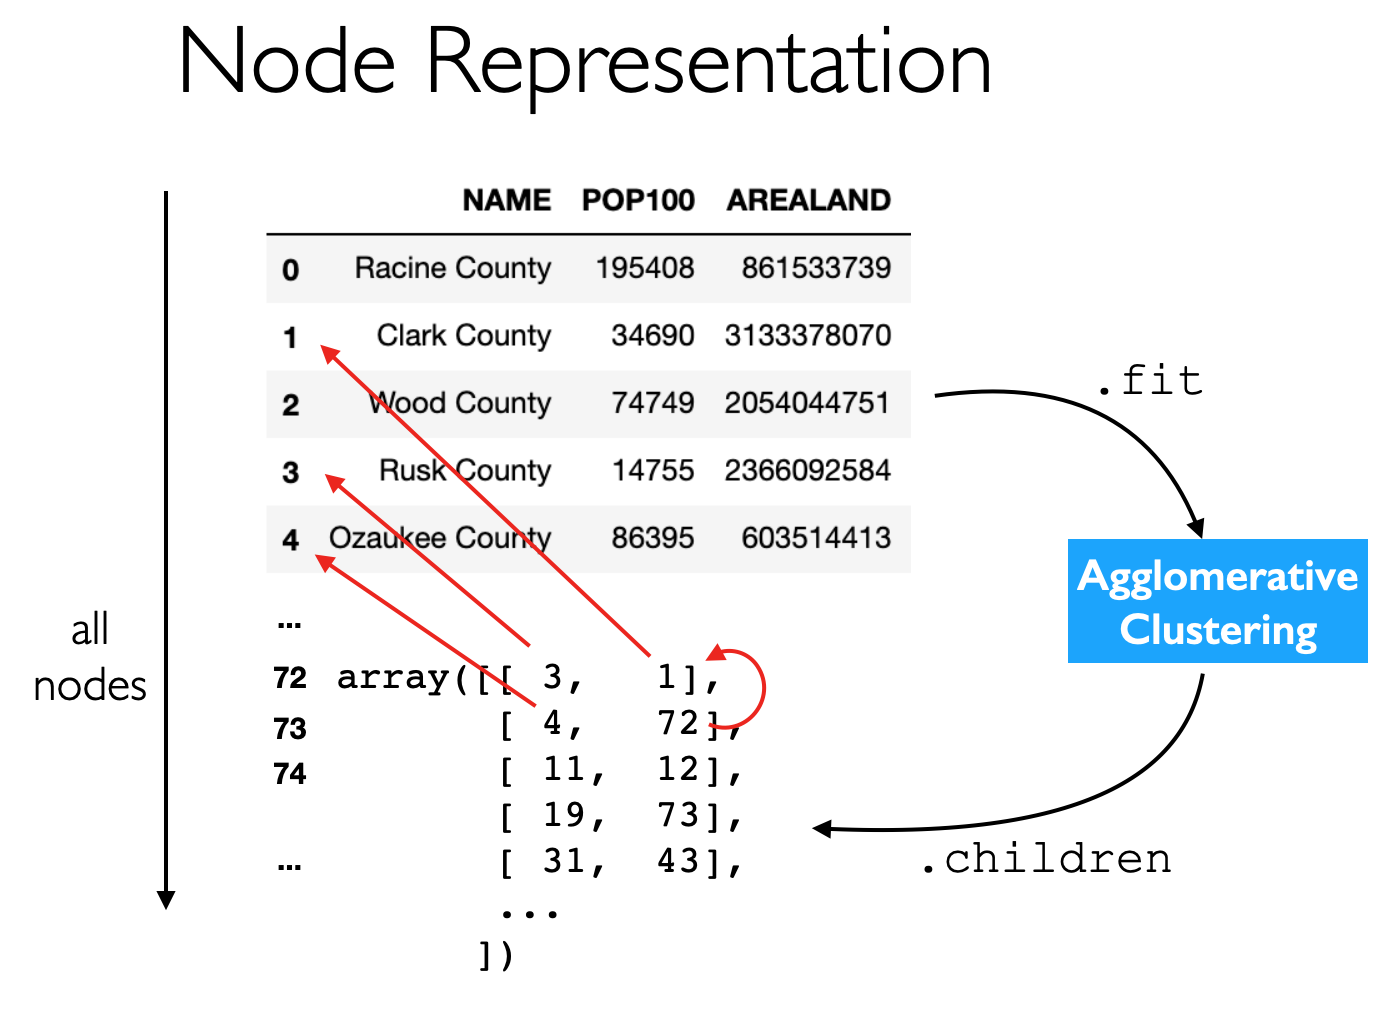

In [11]:
Image("children.png", width=400)

In [12]:
# c.children_

In [13]:
# get the first child
c.children_[0]

array([44, 62])

In [14]:
df.iloc[[44,62]]

,NAME,POP100,AREALAND,HU100,developed,forest,pasture,crops,geometry
44,Forest County,9304,2626939844,8970,0.031107,0.534801,0.004466,0.011161,"POLYGON ((568513.86038 2567267.07976, 568511.3..."
62,Menominee County,4232,926217566,2253,0.029589,0.533466,0.001092,0.002670,"POLYGON ((551112.77265 2479206.62887, 551125.3..."


In [15]:
print(len(df))

72


In [16]:
# print node 73
c.children_[73-len(df)]

array([21, 53])

In [17]:
c.children_

array([[ 44,  62],
       [ 21,  53],
       [ 11,  12],
       [ 19,  73],
       [ 31,  43],
       [ 20,  35],
       [ 58,  74],
       [  1,  27],
       [ 50,  77],
       [ 24,  68],
       [ 16,  34],
       [ 26,  57],
       [ 22,  65],
       [ 39,  47],
       [ 63,  69],
       [ 28,  38],
       [  9,  33],
       [  0,  10],
       [  2,  42],
       [  6,  64],
       [ 30,  61],
       [  3,  60],
       [ 36,  59],
       [  8,  66],
       [ 37,  88],
       [ 32,  70],
       [ 13,  54],
       [ 14,  48],
       [ 72,  87],
       [ 40,  55],
       [  4,  51],
       [ 49,  90],
       [ 45,  81],
       [ 67,  75],
       [ 29,  91],
       [ 79,  80],
       [ 23,  76],
       [ 93,  95],
       [ 98, 100],
       [ 46,  86],
       [ 41,  96],
       [ 18,  97],
       [ 25,  83],
       [ 78, 108],
       [ 94, 101],
       [ 82, 107],
       [  5,  84],
       [ 56,  71],
       [ 17, 103],
       [105, 110],
       [ 89, 106],
       [ 92, 115],
       [112,

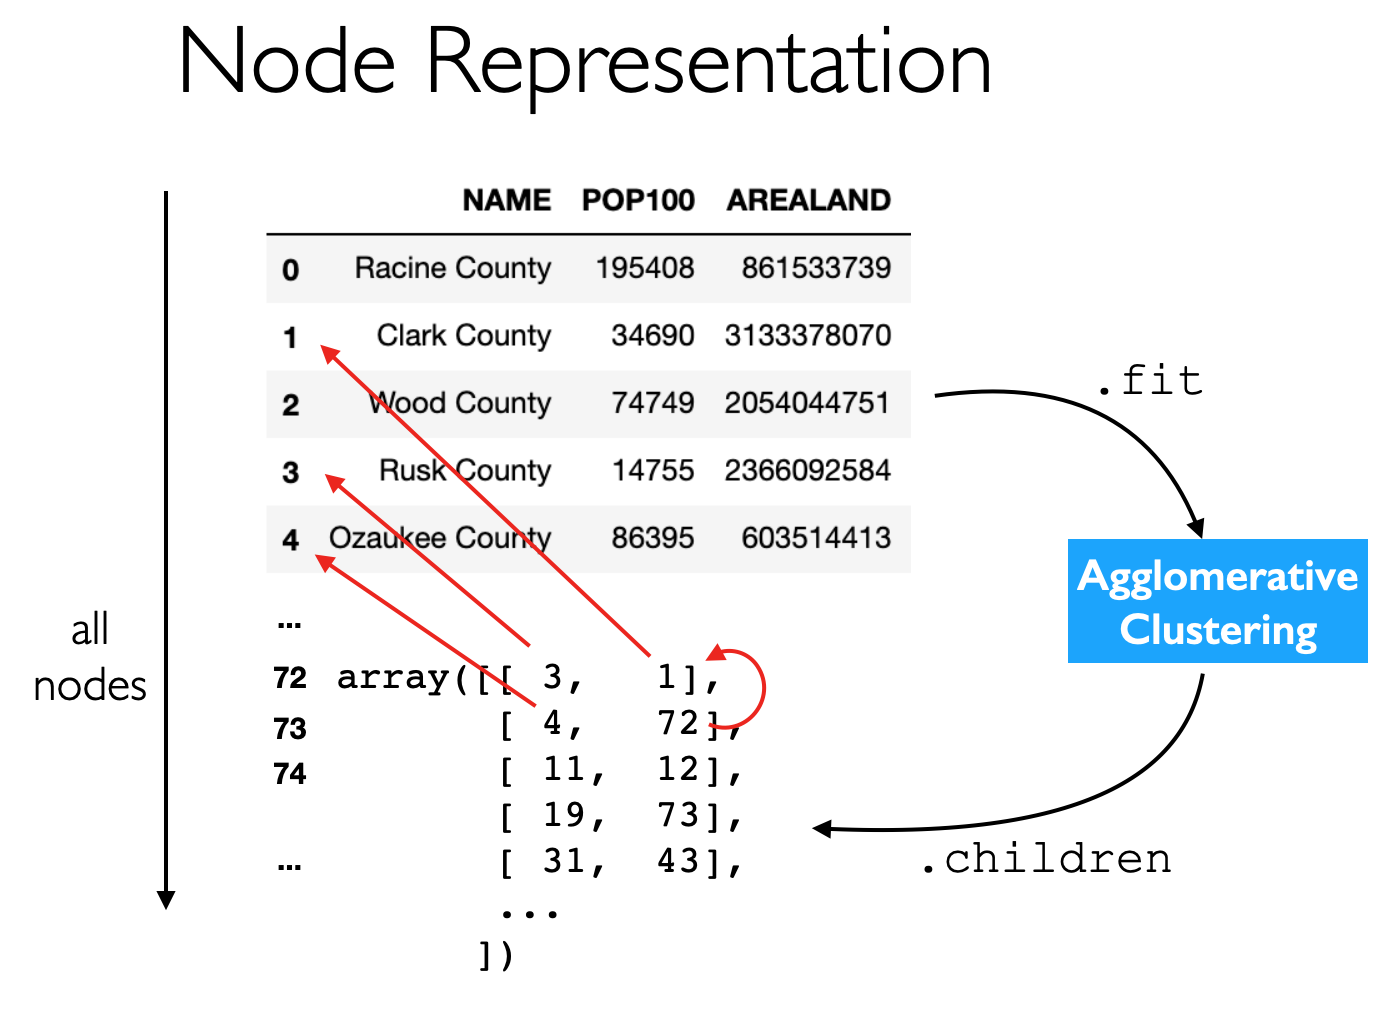

In [18]:
Image("children.png", width=400)

In [19]:
# for the subtree rooted at node_idx, how many nodes are in the subtree?
def node_count(node_idx):
    # print(node_idx)
    if node_idx < len(df):
        return 1
    else:
        left, right = c.children_[node_idx - len(df)]
        return node_count(left) + node_count(right) + 1

node_count(72)

3

In [20]:
node_count(len(df) + len(c.children_) - 1)

143

In [21]:
# c.children_

## Linkage Matrix

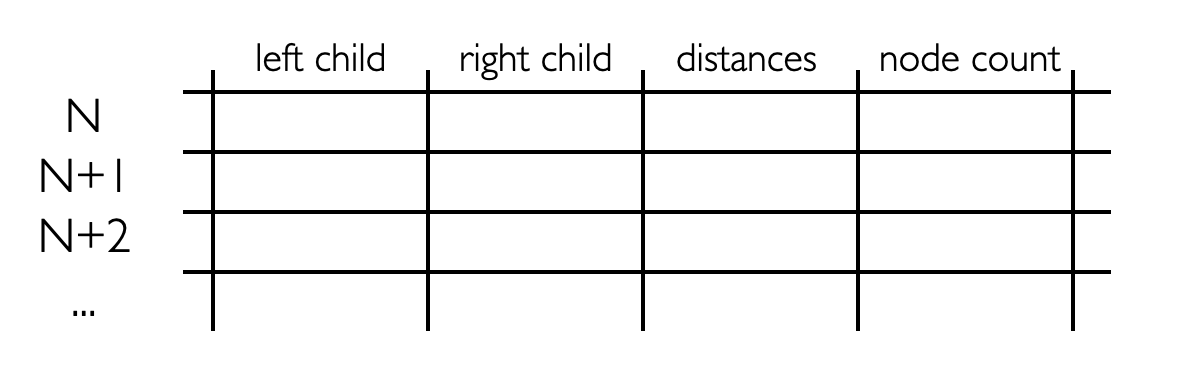

In [22]:
Image("linkage.png", width=400)

In [23]:
distances = c.distances_.reshape(-1, 1)
# distances 

In [24]:
counts = [node_count(node_idx) for node_idx in range(len(df), len(df)+len(c.children_))]
counts = np.array(counts).reshape(-1,1)

In [25]:
linkage = np.concatenate([
    c.children_, # columns 1 & 2 in the linkage matrix
    distances, # column 3
    counts, # column 4
], axis=1)

linkage

array([[4.40000000e+01, 6.20000000e+01, 9.35791131e-03, 3.00000000e+00],
       [2.10000000e+01, 5.30000000e+01, 1.60414861e-02, 3.00000000e+00],
       [1.10000000e+01, 1.20000000e+01, 2.09202131e-02, 3.00000000e+00],
       [1.90000000e+01, 7.30000000e+01, 2.15129315e-02, 5.00000000e+00],
       [3.10000000e+01, 4.30000000e+01, 2.42482837e-02, 3.00000000e+00],
       [2.00000000e+01, 3.50000000e+01, 2.67353575e-02, 3.00000000e+00],
       [5.80000000e+01, 7.40000000e+01, 2.93823187e-02, 5.00000000e+00],
       [1.00000000e+00, 2.70000000e+01, 3.47530501e-02, 3.00000000e+00],
       [5.00000000e+01, 7.70000000e+01, 3.78848417e-02, 5.00000000e+00],
       [2.40000000e+01, 6.80000000e+01, 3.87547719e-02, 3.00000000e+00],
       [1.60000000e+01, 3.40000000e+01, 4.19291386e-02, 3.00000000e+00],
       [2.60000000e+01, 5.70000000e+01, 4.23187960e-02, 3.00000000e+00],
       [2.20000000e+01, 6.50000000e+01, 4.34132595e-02, 3.00000000e+00],
       [3.90000000e+01, 4.70000000e+01, 4.48402619e

## Dendrogram

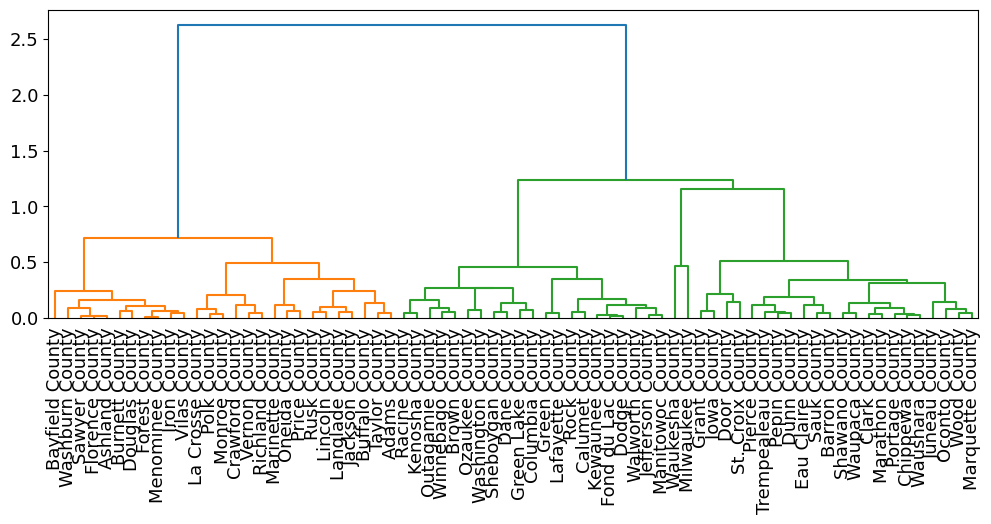

In [26]:
fig, ax = plt.subplots(figsize =(12,4))
dendrogram(linkage, labels=df["NAME"].values, ax=ax)
ax.tick_params(labelsize=13)
None

In [27]:
df

,NAME,POP100,AREALAND,HU100,developed,forest,pasture,crops,geometry
0,Racine County,195408,861533739,82164,0.230906,0.100167,0.072588,0.482126,"POLYGON ((645313.81834 2212738.58489, 645456.3..."
1,Clark County,34690,3133378070,15076,0.046476,0.326691,0.022979,0.444642,"POLYGON ((431909.29098 2393751.35940, 433872.5..."
2,Wood County,74749,2054044751,34088,0.080285,0.226244,0.023411,0.320990,"POLYGON ((498653.94690 2388370.84202, 498647.3..."
3,Rusk County,14755,2366092584,8883,0.035567,0.473937,0.049572,0.138357,"POLYGON ((397166.23292 2498521.78567, 397167.7..."
4,Ozaukee County,86395,603514413,36267,0.222642,0.088609,0.127867,0.389109,"POLYGON ((654796.85595 2272096.94081, 654799.8..."
...,...,...,...,...,...,...,...,...,...
67,Washburn County,15911,2064515991,12979,0.047761,0.609277,0.075988,0.050258,"POLYGON ((344661.07082 2572737.00086, 344660.4..."
68,Monroe County,44673,2333270295,19204,0.066948,0.421153,0.148289,0.215588,"POLYGON ((436857.69239 2316241.29531, 436976.8..."
69,Richland County,18021,1518120276,8868,0.054007,0.488928,0.250210,0.164889,"POLYGON ((457338.65941 2298254.23217, 457337.5..."
70,Price County,14159,3248866440,11120,0.033263,0.431089,0.039663,0.016128,"POLYGON ((462928.25547 2551125.09835, 462875.5..."


In [28]:
# set NAME as index
df1= df.set_index("NAME")

In [29]:
# compare the last two counties in the dendrogram to see the similarity between them
df1.loc[["Wood County", "Marquette County"]]

,POP100,AREALAND,HU100,developed,forest,pasture,crops,geometry
NAME,,,,,,,,
Wood County,74749,2054044751,34088,0.080285,0.226244,0.023411,0.320990,"POLYGON ((498653.94690 2388370.84202, 498647.3..."
Marquette County,15404,1180045997,9896,0.058674,0.260061,0.047678,0.313069,"POLYGON ((541227.99438 2327564.06470, 541232.2..."


In [30]:
# compare the last two counties in the dendrogram with the first county to see their dissimilarity with the first county
df1.loc[["Wood County", "Marquette County", "Bayfield County"]]

,POP100,AREALAND,HU100,developed,forest,pasture,crops,geometry
NAME,,,,,,,,
Wood County,74749,2054044751,34088,0.080285,0.226244,0.023411,0.320990,"POLYGON ((498653.94690 2388370.84202, 498647.3..."
Marquette County,15404,1180045997,9896,0.058674,0.260061,0.047678,0.313069,"POLYGON ((541227.99438 2327564.06470, 541232.2..."
Bayfield County,15014,3827680323,12999,0.041450,0.718962,0.058296,0.008185,"POLYGON ((394311.35486 2690830.88205, 394217.3..."


## Redraw an image more simply, using only 4 colors

 - capital.jpg: https://en.wikipedia.org/wiki/Madison,_Wisconsin

(688, 600, 3)


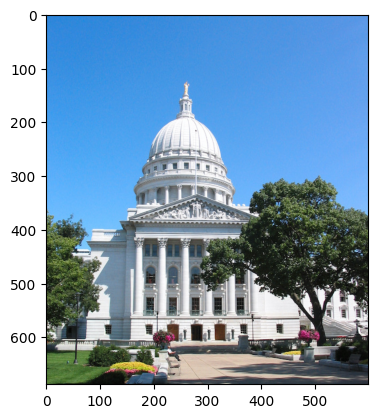

In [31]:
import matplotlib.pyplot as plt
img = plt.imread("capital.jpg")
print(img.shape)
plt.imshow(img)

In [32]:
# img

In [33]:
tbl = img.reshape(-1, 3)
tbl

array([[ 41, 130, 220],
       [ 44, 129, 219],
       [ 47, 128, 217],
       ...,
       [ 41,  45,  54],
       [ 39,  46,  56],
       [ 39,  46,  56]], dtype=uint8)

In [34]:
km = KMeans(4)
km.fit(tbl)

KMeans(n_clusters=4)

In [35]:
km.cluster_centers_

array([[118.63551297, 128.66442671, 126.58251147],
       [ 82.14021898, 158.90520548, 235.55240152],
       [223.17415933, 221.43268094, 220.63022133],
       [ 45.30436324,  52.65427518,  42.76642999]])

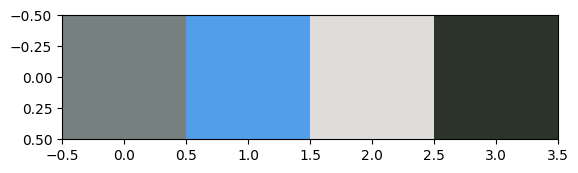

In [36]:
plt.imshow(km.cluster_centers_.reshape(1, -1, 3)/255)

In [37]:
groups = km.predict(tbl)
groups

array([1, 1, 1, ..., 3, 3, 3], dtype=int32)

In [38]:
km.cluster_centers_[[0,0,1,1,1]]

array([[118.63551297, 128.66442671, 126.58251147],
       [118.63551297, 128.66442671, 126.58251147],
       [ 82.14021898, 158.90520548, 235.55240152],
       [ 82.14021898, 158.90520548, 235.55240152],
       [ 82.14021898, 158.90520548, 235.55240152]])

In [39]:
img2 = km.cluster_centers_[groups]
img2

array([[ 82.14021898, 158.90520548, 235.55240152],
       [ 82.14021898, 158.90520548, 235.55240152],
       [ 82.14021898, 158.90520548, 235.55240152],
       ...,
       [ 45.30436324,  52.65427518,  42.76642999],
       [ 45.30436324,  52.65427518,  42.76642999],
       [ 45.30436324,  52.65427518,  42.76642999]])

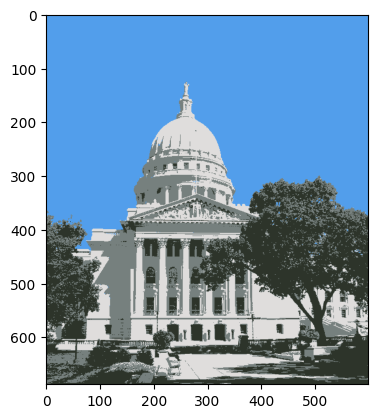

In [40]:
plt.imshow(img2.reshape(img.shape)/255)